<a href="https://colab.research.google.com/github/renardelyon/ML-jamur/blob/main/Data_analysis_TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import matplotlib
from operator import itemgetter
from matplotlib.ticker import FormatStrFormatter

In [2]:
df = pd.read_csv('./data (1).csv')
df_control = pd.read_csv('./data_control.csv')

In [3]:
df.drop(columns=[df.columns[0]], axis=0, inplace=True)
df_control.drop(columns=[df_control.columns[0]], axis=1, inplace=True)

In [14]:
df_control_day = df_control.groupby(['Date']).mean().round(decimals=1).reset_index(drop=True)

In [15]:
df_day = df.groupby(['Date']).mean().round(decimals=1).reset_index(drop=True)

In [24]:
class Counter:
    def __init__(self, seed, multiplier):
        self.counter = seed
        self.multiplier = multiplier

    def fun(self, n):
        if True:  # if you need to check a condition
            self.counter += 1  # add any value you see fit
        return n + self.counter * self.multiplier

In [29]:
counter = Counter(-1, 1)
counter_control = Counter(-1, 1)

df_day['Time'] = df_day['Time'].apply(lambda x: counter.fun(0))
df_control_day['Time'] = df_control_day['Time'].apply(lambda x: counter_control.fun(0))

In [32]:
df1 = df[df['Date'] == '12/04/21'].reset_index(drop=True)
df2 = df[df['Date'] == '12/05/21'].reset_index(drop=True)
df3 = df[df['Date'] == '12/06/21'].reset_index(drop=True)
df_control1 = df_control[df_control['Date'] == '12/04/21'].reset_index(drop=True)
df_control2 = df_control[df_control['Date'] == '12/05/21'].reset_index(drop=True)
df_control3 = df_control[df_control['Date'] == '12/06/21'].reset_index(drop=True)

In [33]:
def create_new_df(df: pd.DataFrame) -> pd.DataFrame:
  new_df = df.copy().loc[df.index[-1]].to_frame().T
  new_df = pd.concat([new_df for i in range(3)], axis=0)
  return new_df


In [34]:
df3 = pd.concat([df3, create_new_df(df3)], axis=0).reset_index(drop=True)
df_control3 = pd.concat([df_control3, create_new_df(df_control3)], axis=0).reset_index(drop=True)

In [35]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df_control1.shape)
print(df_control2.shape)
print(df_control3.shape)

(48, 4)
(48, 4)
(48, 4)
(48, 4)
(48, 4)
(48, 4)


In [36]:
def create_df_mean(col: list, *args: pd.DataFrame) -> pd.DataFrame:
  df_all = [*args]
  df_all_length = len(df_all)
  counter = Counter(-1, 1800)
  if df_all_length != 0:
    df_mean: pd.DataFrame = df_all[0].copy()
    df_mean['Time'] = df_mean['Time'].apply(lambda x: counter.fun(0))
    df_mean[col] = reduce(lambda a, b: a[col]+b[col], df_all).div(df_all_length)
    df_mean[col] = df_mean[col].astype(float).round(decimals=1)
  else:
    raise Exception('df length is 0')
  return df_mean


In [37]:
df_mean = create_df_mean(df1.columns[2:], df1, df2, df3).drop('Date', axis=1)
df_mean_control = create_df_mean(
    df_control.columns[2:], 
    df_control1,
    df_control
).drop('Date', axis=1)

In [42]:
def create_df_for_plot(df: pd.DataFrame, divider: int = 1) -> dict:
  x = df['Time'].div(divider)
  humidity = df['Humidity (%)']
  temp = df['Temp (C)']
  return {
      'x': x,
      'humidity': humidity,
      'temp': temp
  }


In [43]:
second_hour = 3600
var = create_df_for_plot(df_mean, second_hour)
var_control = create_df_for_plot(df_mean_control, second_hour)

var_day = create_df_for_plot(df_day)
var_day_control = create_df_for_plot(df_control_day)

t = df_day['Time']
hum_day = df_day

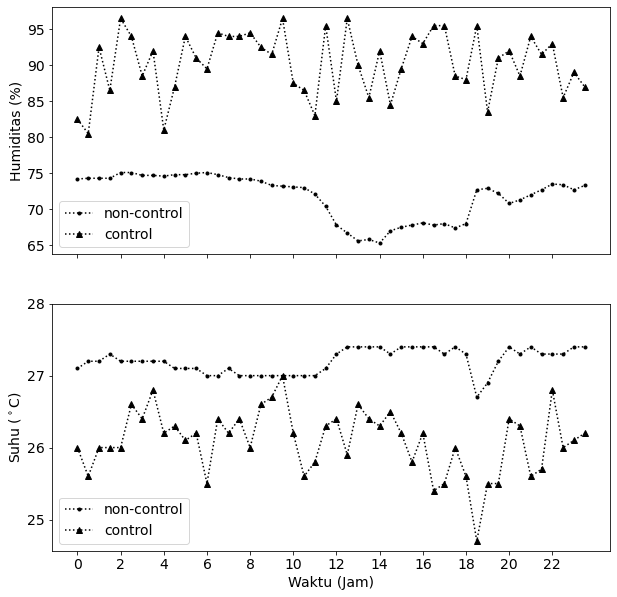

In [76]:
font = {
        'weight' : 'normal',
        'size'   : 14
        }

matplotlib.rc('font', **font)

x, humidity, temp = itemgetter('x', 'humidity', 'temp')(var)
x_control, hum_control, temp_control = itemgetter('x', 'humidity', 'temp')(var_control)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(x, humidity, 'k.:', label='non-control') 
ax[0].plot(x_control, hum_control, 'k^:', label= 'control')
ax[0].tick_params('x', labelbottom=False)
ax[0].set_xticks(np.arange(0, 24, 2).tolist())
ax[0].set_ylabel('Humiditas (%)')
ax[0].legend()


# share x and y
ax[1].plot(x, temp, 'k.:', label='non-control')
ax[1].plot(x_control, temp_control, 'k^:', label='control')
ax[1].set_xticks(np.arange(0, 24, 2).tolist())
ax[1].set_xlabel('Waktu (Jam)')
ax[1].set_ylabel('Suhu ($^\circ$C)')
ax[1].set_yticks(np.arange(25, 29, 1).tolist())
ax[1].legend()

plt.show()
fig.savefig('./per_jam.png')

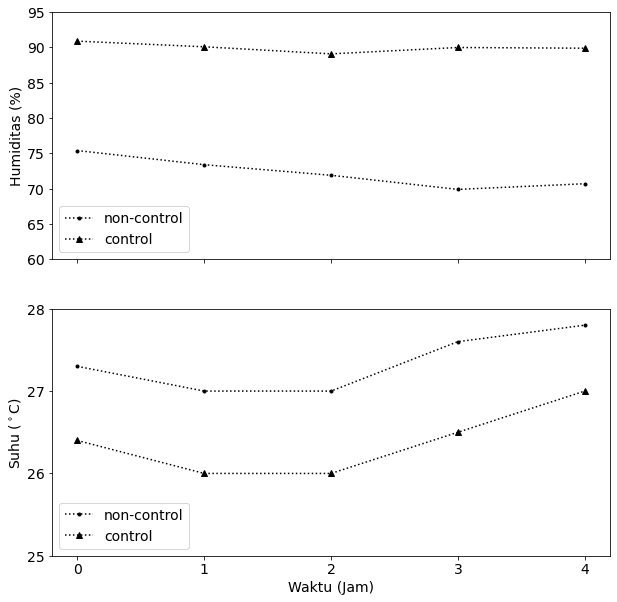

In [75]:
x_day, hum_day, temp_day = itemgetter('x', 'humidity', 'temp')(var_day)
x_day_control, hum_day_control, temp_day_control = itemgetter('x', 'humidity', 'temp')(var_day_control)

fig, ax = plt.subplots(2, 1, figsize=(10, 10))
ax[0].plot(x_day, hum_day, 'k.:', label='non-control') 
ax[0].plot(x_day_control, hum_day_control, 'k^:', label= 'control')
ax[0].tick_params('x', labelbottom=False)
ax[0].set_xticks(np.arange(0, 5, 1).tolist())
ax[0].set_ylabel('Humiditas (%)')
ax[0].set_ylim([60, 95])
ax[0].legend()


# share x and y
ax[1].plot(x_day, temp_day, 'k.:', label='non-control')
ax[1].plot(x_day_control, temp_day_control, 'k^:', label='control')
ax[1].set_xticks(np.arange(0, 5, 1).tolist())
ax[1].set_xlabel('Waktu (Jam)')
ax[1].set_ylabel('Suhu ($^\circ$C)')
ax[1].set_yticks(np.arange(25, 29, 1).tolist())
ax[1].legend(loc='lower left')

plt.show()
fig.savefig('./per_hari.png')